In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from GatherOasisData import GatherOASISData
from GatherWeatherConditions import GatherWeatherConditons
import os

In [2]:
# start_date = '20210130'
start_date = '20240429'
end_date = '20240430'

#gather weather conditions
weather = GatherWeatherConditons(start_date=start_date, end_date=end_date, time_steps='HOURLY')
weather_df = weather.fetch_and_process_data()

#reports: actual demand, day ahead market(24 hourly preds), 2-day ahead (48 hourly preds)
report_types = ['ACTUAL', 'DAM', '2DA']


#store reports in dict
reports_dfs = {}

#generate reports for each
for report in report_types:
    OASIS = GatherOASISData(start_date, end_date, 'SLD_FCST', report)
    reports_dfs[report + '_df'] = OASIS.process_data()
    print(f'{report} df complete.')


Downloaded http://oasis.caiso.com/oasisapi/SingleZip?queryname=SLD_FCST&market_run_id=ACTUAL&startdatetime=20240429T00:00-0800&enddatetime=20240430T00:00-0800&version=1
Extracting data from 20240429_20240430_SLD_FCST_ACTUAL\20240429_20240430_SLD_FCST_ACTUAL_20240618_16_20_59_v1.xml
Original UTC time: 2024-04-29T19:00:00-00:00 => Converted PST time: 2024-04-29 12:00:00-07:00
Original UTC time: 2024-04-30T00:00:00-00:00 => Converted PST time: 2024-04-29 17:00:00-07:00
Original UTC time: 2024-04-30T02:00:00-00:00 => Converted PST time: 2024-04-29 19:00:00-07:00
Original UTC time: 2024-04-30T06:00:00-00:00 => Converted PST time: 2024-04-29 23:00:00-07:00
Original UTC time: 2024-04-29T17:00:00-00:00 => Converted PST time: 2024-04-29 10:00:00-07:00
Original UTC time: 2024-04-29T18:00:00-00:00 => Converted PST time: 2024-04-29 11:00:00-07:00
Original UTC time: 2024-04-29T20:00:00-00:00 => Converted PST time: 2024-04-29 13:00:00-07:00
Original UTC time: 2024-04-29T21:00:00-00:00 => Converted P

In [3]:
reports_dfs['2DA_df'].index.min()
# type(reports_dfs['2DA_df'].index)

Timestamp('2024-04-29 01:00:00-0700', tz='America/Los_Angeles')

In [45]:
weather_df.index

DatetimeIndex(['2024-04-19 17:00:00', '2024-04-19 18:00:00',
               '2024-04-19 19:00:00', '2024-04-19 20:00:00',
               '2024-04-19 21:00:00', '2024-04-19 22:00:00',
               '2024-04-19 23:00:00', '2024-04-20 00:00:00',
               '2024-04-20 01:00:00', '2024-04-20 02:00:00',
               ...
               '2024-04-29 08:00:00', '2024-04-29 09:00:00',
               '2024-04-29 10:00:00', '2024-04-29 11:00:00',
               '2024-04-29 12:00:00', '2024-04-29 13:00:00',
               '2024-04-29 14:00:00', '2024-04-29 15:00:00',
               '2024-04-29 16:00:00', '2024-04-29 17:00:00'],
              dtype='datetime64[ns]', name='time', length=241, freq=None)

In [43]:
from datetime import datetime
import pytz

def convert_GMT_PST(gmt_str):
    '''
    converts GMT to PST
    '''
    gmt_time = datetime.strptime(gmt_str, "%Y-%m-%dT%H:%M:%S-00:00")
    
    #using pytz to account for DST
    pacific = pytz.timezone("America/Los_Angeles")
    
    #convert
    pacific_time = gmt_time.replace(tzinfo=pytz.utc).astimezone(pacific)
    
    return pacific_time

In [48]:
import pytz
from datetime import datetime
pt_str = convert_GMT_PST('2022-04-20T07:00:00-00:00')

print(pd.to_datetime(pt_str), pt_str)
pt_str

2022-04-20 00:00:00-07:00 2022-04-20 00:00:00-07:00


datetime.datetime(2022, 4, 20, 0, 0, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>)

<Axes: xlabel='TIME'>

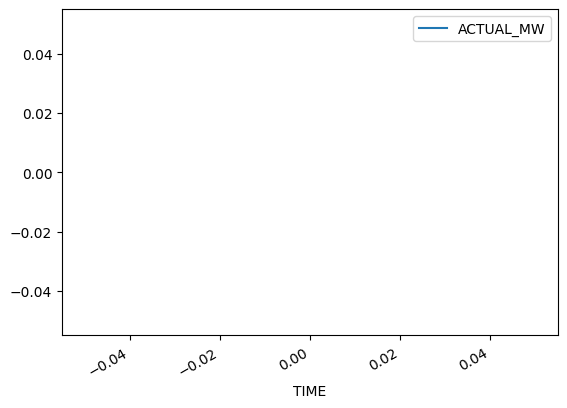

In [4]:
reports_dfs['ACTUAL_df'][50:104].plot()